### matplotlib 차트 유형

1. histogram : 연속형값의 도수(빈도수/개수) 파악
2. bar plot : 범주형값의 개수, 또는 다른 연속값을 파악
3. scatter plot : 산포도(산점도) 두 연속값들의 분포 파악
4. line plot : 시계열데이터(연속값) 변화 파악
5. box plot : 연속형 값의 사분위, 이상치 파악
6. pie chart : 전체 범위 중의 비율

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()    # 폰트의 경로로부터 폰트를 가져오고 get_name으로 이름을 가져온다.
matplotlib.rc('font', family=font)  # family= font의 이름을 가진 폰트로 변경

##### Histogram

- 연속형 값을 일정 구간을 나누어 구간별 데이터포인트의 빈도를 시각화
    - x축 : 연속형 데이터
    - y축 : 구간별 데이터포인트의 개수 (합)

In [2]:
scores = [100, 95, 97, 98, 99, 90, 80, 81, 84, 88, 70, 78, 79, 70, 65, 66, 61, 64, 100, 89]

bins = [60, 70, 80, 90, 100]

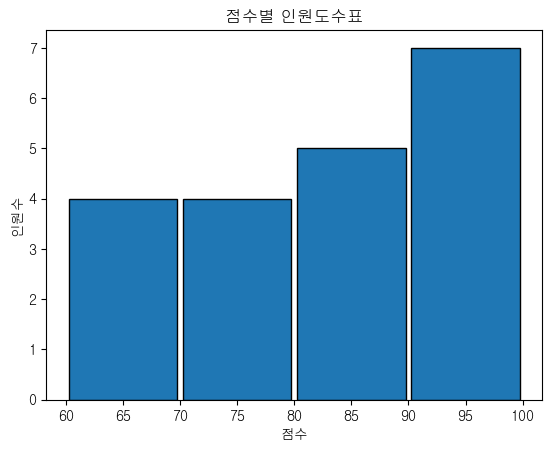

In [ ]:
plt.hist(scores, bins=bins, edgecolor='black', rwidth=0.95)
# bins : 나뉠 구간의 갯수 (기본값 = 10)
# edgecolor : 히스토그램 막대의 경계선 색상
# rwidth : 0~1 사이의 값으로 상대적 너비 조정

plt.xlabel('점수')
plt.ylabel('인원수')
plt.title('점수별 인원도수표')
plt.show()

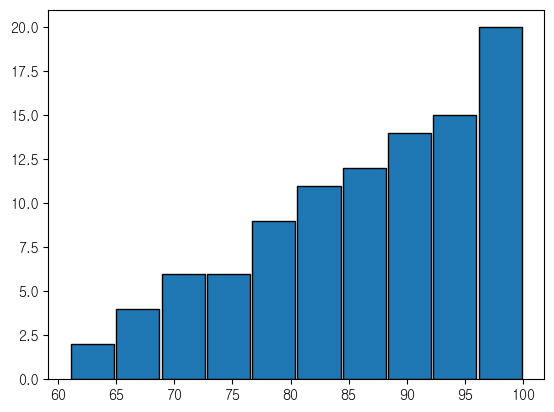

In [ ]:
plt.hist(scores, edgecolor='black', rwidth=0.95, cumulative=True)
# cumulative : 누적 값
plt.show()

In [2]:
# 암호화폐 일일수익률
df = pd.read_csv('./data/crypto_daily_returns.csv')
df

,Date,BTC,ETH,LTC
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,-7.379983
2,9/19/2014,-6.984264,NaN,-7.629499
3,9/20/2014,3.573492,NaN,-0.955003
4,9/21/2014,-2.465854,NaN,-0.945300
...,...,...,...,...
2380,3/28/2021,-0.040672,-1.464535,0.107149
2381,3/29/2021,3.216138,7.587343,5.105316
2382,3/30/2021,2.021625,1.447984,1.135017
2383,3/31/2021,0.001936,3.918042,0.415392


In [3]:
# 데이터프레임 메타데이터 읽기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2385 non-null   object 
 1   BTC     2385 non-null   float64
 2   ETH     2061 non-null   float64
 3   LTC     2385 non-null   float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

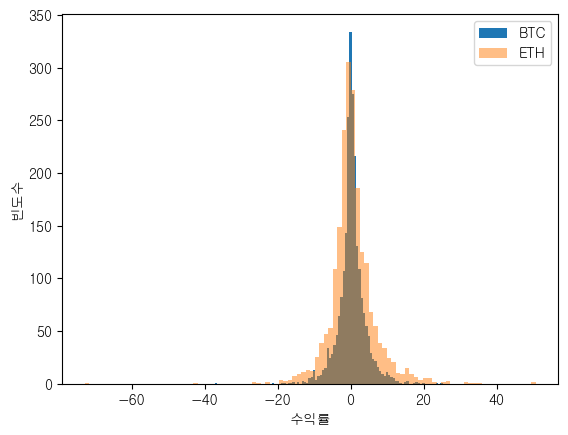

In [ ]:
plt.hist(df['BTC'], bins=100, label='BTC')
plt.hist(df['ETH'], bins=100, label='ETH', alpha=.5)    # alpha= : 투명도
plt.legend()

plt.xlabel('수익률')
plt.ylabel('빈도수')
plt.show
# 수익률
# 빈도수

##### Bar Plot

- 막대 차트
- 범주형 데이터와 연속형 데이터(막대의 길이)의 관계를 시각화
    - x축 : 범주형 데이터 카테고리
    - y축 : 연속형 데이터 (총합, 평균)

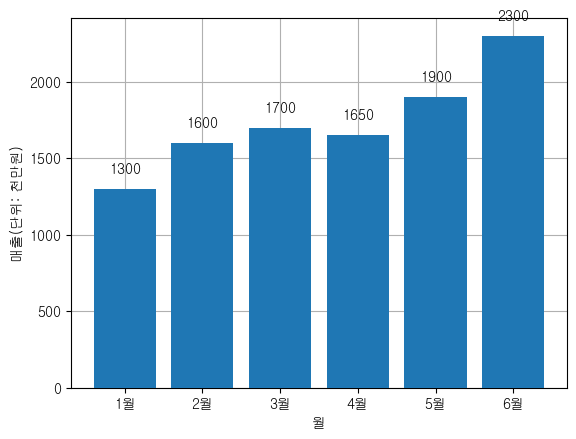

In [ ]:
# 월별 매출 데이터
df = pd.DataFrame({
    'months': ['1월', '2월', '3월', '4월', '5월','6월'],
    'sales': [1300, 1600, 1700, 1650, 1900, 2300]
})
# zorder : z축 깊이 설정(값이 클수록 앞으로 나옴)
plt.bar(df['months'], df['sales'], zorder=10)   

for i, val in enumerate(df['sales']):
    # x축 위치, y축 위치, 텍스트, 텍스트 정렬(위치)
    plt.text(i, val + 100, str(val), ha='center')   # val + 100 : 라벨링 텍스트와 바 사이의 거리 

plt.xlabel('월')
plt.ylabel('매출(단위: 천만원)')
plt.grid(zorder=1)
plt.show()

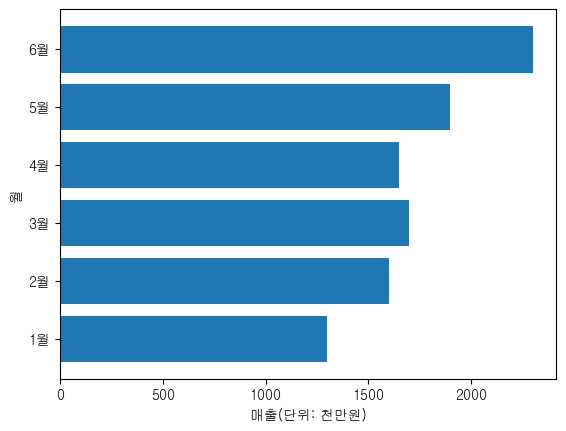

In [ ]:
# 수평 막대그래프
# x축 : 연속형
# y축 : 범주형
plt.barh(df['months'], df['sales'])
# bar와 x, y축 반전
plt.ylabel('월')
plt.xlabel('매출(단위: 천만원)')
plt.show()

In [ ]:
# 나라별 맥주의 갯수 시각화
beers_df = pd.read_csv('./data/beers.csv')
beers_df

,beer_name,beer_type,country
0,Heineken,Pale Lager,Netherlands
1,Guinness,Stout,Ireland
2,Corona Extra,Pale Lager,Mexico
3,Stella Artois,Pilsner,Belgium
4,Budweiser,Pale Lager,USA
5,Hoegaarden,Witbier,Belgium
6,Carlsberg,Pale Lager,Denmark
7,Sapporo,Lager,Japan
8,Asahi,Lager,Japan
9,Becks,Pilsner,Germany


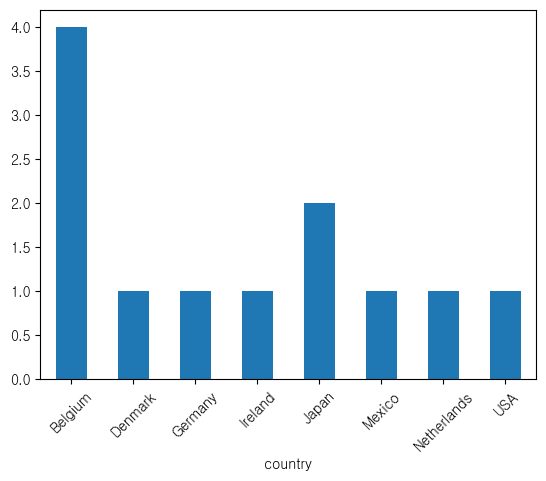

In [ ]:
beer_df_groupby = beers_df.groupby('country')['beer_name'].count()
# print(beer_df_groupby)

# bar chart
# plt.bar(beer_df_groupby.index, beer_df_groupby)

# histogram
# plt.hist(beers_df['country'], bins=beers_df['country'].nunique(), rwidth=0.9)

# Series / DataFrame 기준으로 plot
beer_df_groupby.plot(kind='bar')


plt.xticks(rotation=45)
plt.show()

##### Line plot

- 시계열 데이터에서 변화하는 값의 추이를 시각화
    - x축 : 연속형 데이터
    - y축 : 연속형 데이터

In [ ]:
# 주가 추이
df = pd.DataFrame({
    'Date': pd.date_range(start='2025-01-01', periods=14, freq='D'),    # pd.date_range(start=시작일, periods=개수, freq=단위)
    'APPL': np.random.randint(100, 150, 14),
    'MSFT': np.random.randint(100, 150, 14)
})
df

,Date,APPL,MSFT
0,2025-01-01,135,136
1,2025-01-02,113,146
2,2025-01-03,106,134
3,2025-01-04,109,143
4,2025-01-05,136,124
5,2025-01-06,142,131
6,2025-01-07,132,102
7,2025-01-08,149,124
8,2025-01-09,141,129
9,2025-01-10,101,114


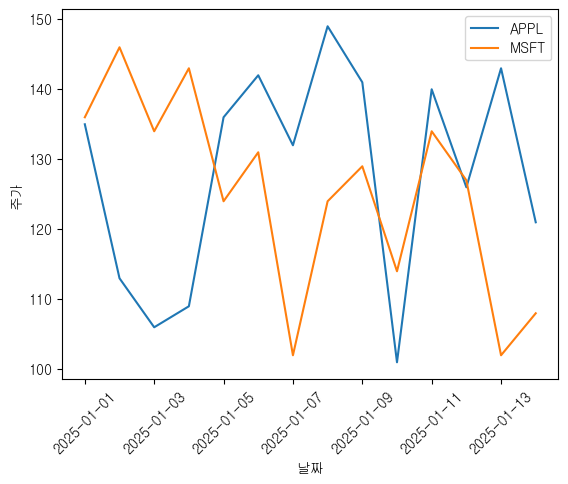

In [24]:
plt.plot(df['Date'], df['APPL'], label='APPL')
plt.plot(df['Date'], df['MSFT'], label='MSFT')

plt.xlabel('날짜')
plt.ylabel('주가')
plt.xticks(rotation=45)
plt.legend()
plt.show()

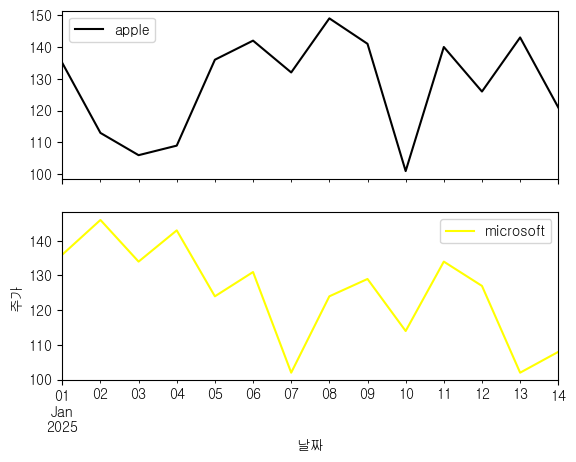

In [ ]:
df.plot(
    x='Date',
    y=['APPL', 'MSFT'],
    color=['black', 'yellow'],
    label=['apple', 'microsoft'],   # label을 지정해주면 legend를 설정하지 않아도 들어감
    subplots=True                   # subplot 형태로 그림    
)   # kind 속성을 주지 않으면 기본적으로 선그래프

plt.xlabel('날짜')
plt.ylabel('주가')
plt.show()

In [28]:
# 코인 주가 추이
crypto_df = pd.read_csv('./data/crypto_daily_prices.csv')
crypto_df

,Date,BTC-USD Price,ETH-USD Price,LTC-USD Price
0,9/17/2014,457.334015,NaN,5.058550
1,9/18/2014,424.440002,NaN,4.685230
2,9/19/2014,394.795990,NaN,4.327770
3,9/20/2014,408.903992,NaN,4.286440
4,9/21/2014,398.821014,NaN,4.245920
...,...,...,...,...
2380,3/28/2021,55950.746090,1691.355957,185.028488
2381,3/29/2021,57750.199220,1819.684937,194.474777
2382,3/30/2021,58917.691410,1846.033691,196.682098
2383,3/31/2021,58918.832030,1918.362061,197.499100


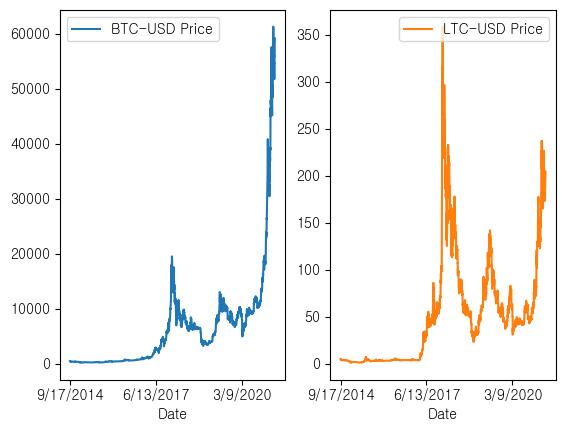

In [31]:
crypto_df.plot(
    x='Date',
    y=['BTC-USD Price','LTC-USD Price'],
    subplots=True,
    layout=(1, 2)
)

plt.show()

##### Scatter Plot

- 두 축의 변수 관계를 시각화
- 두 변수 간 상관관계, 클러스터링, 이상치 파악에 도움

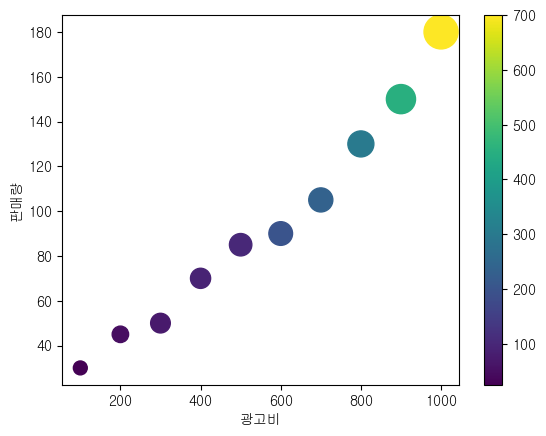

In [35]:

df = pd.DataFrame({
    'ad_budget': np.arange(100, 1001, 100), 
    'sales': [30, 45, 50, 70, 85, 90, 105, 130, 150, 180],
    'visitor': [100, 140, 200, 210, 260, 290, 300, 350, 440, 600],
    'colors': [25, 50, 70, 90, 100, 200, 235, 300, 450, 700]
})

# x축, y축, s=점의 크기, c=점의 색상
plt.scatter(df['ad_budget'], df['sales'], s=df['visitor'], c=df['colors'])

plt.colorbar()

plt.xlabel('광고비')
plt.ylabel('판매량')
plt.show()

##### Pie Chart

- 전체에서 각 부분이 기여하는 비율을 시각화

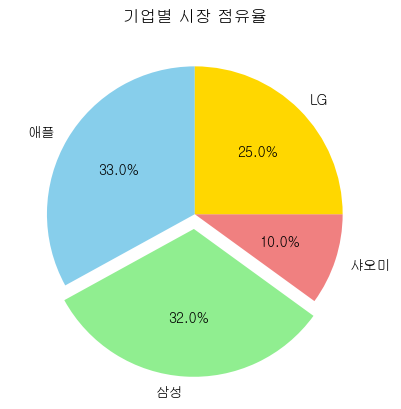

In [ ]:
df = pd.DataFrame({
    'label': ['애플', '삼성', '샤오미', 'LG'],
    'market_share': [33, 32, 10, 25], 
    'sales': [1345, 234, 545, 454],
    'explode': [0, 0.1, 0, 0]
})

plt.pie(
    df['market_share'],
    labels=df['label'],
    autopct='%.1f%%',   # 데이터를 표현해줄 형태. 양쪽의 % 사이에 형태를 지정
    startangle=90,      # 시작 기준 위치. (3시방향을 시작점으로 각도를 지정해주면 그 기준으로부터 반시계방향으로.)
    explode=df['explode'],  # 강조하기 위해서 pie chart에서 살짝 빼줌
    colors=['skyblue', 'lightgreen', 'lightcoral', 'gold']
)

plt.title('기업별 시장 점유율')
plt.show()

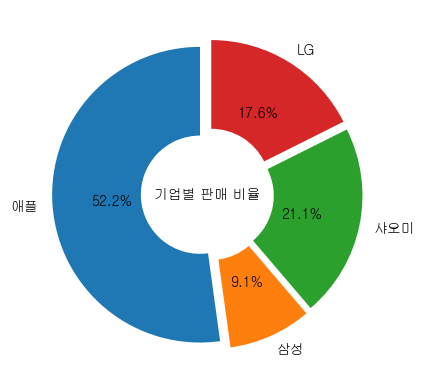

In [46]:
plt.pie(
    df['sales'],
    labels=df['label'],
    autopct='%.1f%%',
    startangle=90,
    explode=[.05, .05, .05, .05],
    wedgeprops={'width': .6}    # 도넛모양, 0~1의 값을 준다.
)

plt.text(0, 0 ,'기업별 판매 비율', ha='center', va='center')


plt.show()

##### Box Plot

- 연속형 데이터의 분포를 사분위수로 시각화
- 이상치 outlier를 도출하는 데에 효과적
    - x축 : 이산값(범주형) 데이터
    - y축 : 연속형 데이터

- 표현되는 값들
    - max, Q3, Q2, Q1, min: 최대값, 3분위수(75%), 2분위수(50%), 1분위수(25%), 최소값
    - IQR (Inter-quartile Range) : 사분범위

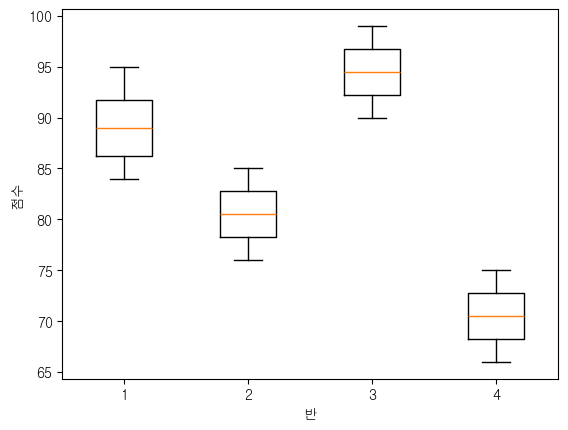

In [50]:
# 반별 시험 성적 데이터 (2차원 배열)

class_scores = [
    [85, 88, 90, 92, 93, 87, 95, 91, 84, 86],  # Class A
    [78, 82, 85, 80, 79, 84, 81, 83, 77, 76],  # Class B
    [92, 95, 96, 94, 90, 97, 93, 91, 98, 99],  # Class C
    [70, 72, 68, 75, 74, 69, 73, 71, 66, 67]   # Class D
]

plt.boxplot(class_scores)


plt.xlabel('반')
plt.ylabel('점수')
plt.show()

In [53]:
data = class_scores[0]

print('최소값:', np.min(data))
print('사분위수(Q1):', np.percentile(data, 25))
print('사분위수(Q2):', np.percentile(data, 50), np.median(data))
print('사분위수(Q3):', np.percentile(data, 75))
print('최대값:', np.max(data))

최소값: 84
사분위수(Q1): 86.25
사분위수(Q2): 89.0 89.0
사분위수(Q3): 91.75
최대값: 95


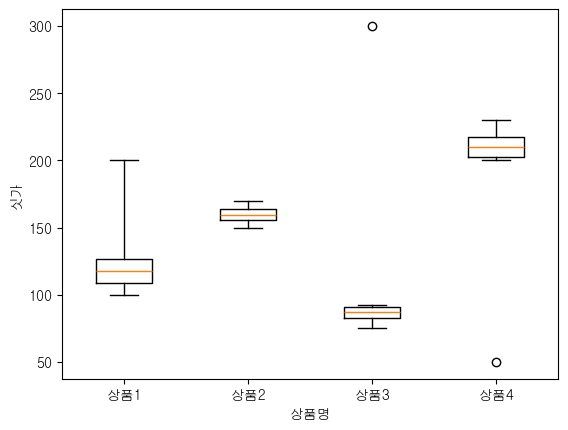

In [ ]:
weird_data = [
    [100, 120, 130, 110, 115, 105, 125, 200],   # 이상치 200
    [150, 160, 170, 155, 165, 158],
    [80, 85, 90, 75, 92, 87, 300],   # 이상치 300
    [200, 220, 210, 205, 215, 230, 50]    # 이상치 50
]

# whis 기본값 : 1.5
# [참고] 수염의 길이 계산 공식 : [Q1 -whis * IQR, Q3 + whis * IQR] / 이 범위를 벗어나면 이상치로 간주하겠다고 지정
# [참고] IQR = Q3 - Q1

plt.boxplot(weird_data, whis=5)     # whis 기본값 1.5
plt.xticks([1, 2, 3, 4], ['상품1', '상품2', '상품3', '상품4'])
plt.xlabel('상품명')
plt.ylabel('싯가')
plt.show()